In [41]:
import sys
sys.path.append('./app/')
import numpy as np
import fileio
import evaluation
import preprocess
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dfoff ,dftest,dfon = fileio.read_all('./data/')

In [8]:
# 预处理，部分特征处理
dfoff,weekdaycols = preprocess.preprocess(dfoff)
dftest,weekdaycols = preprocess.preprocess(dftest)
# 分割测试子集和训练子集
x_train,y_train,x_test,y_test,train,valid = preprocess.split_t_v(dfoff,weekdaycols)

ValueError: too many values to unpack (expected 4)

In [11]:
#xgb 和 LGD
import xgboost as xgb
from sklearn.linear_model import SGDClassifier

In [13]:
# 模型一
model_sgd = SGDClassifier(loss='log',penalty='elasticnet',fit_intercept=True,max_iter=100,
                      shuffle=True,alpha = 0.01,l1_ratio = 0.01,n_jobs=1,class_weight=None)

model_sgd.fit(x_train, y_train)
y_pre = model_sgd.predict(x_test)
y_prob = model_sgd.predict_proba(x_test)
evaluation.get_official_auc(y_prob[:,1],y_test,valid)

c:\cx\python\python36\installthere\lib\site-packages\sklearn\metrics\_ranking.py:805: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
c:\cx\python\python36\installthere\lib\site-packages\sklearn\metrics\_ranking.py:89: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


0.5561952226087841

In [14]:
# 模型二
param_dist = {'objective': 'binary:logistic', 'n_estimators': 17,
              'subsample': 0.8, 'max_depth': 13, 'n_jobs': -1}
model_xgb = xgb.XGBClassifier(**param_dist)

model_xgb.fit(x_train, y_train)
y_pre = model_xgb.predict(x_test)
y_prob = model_xgb.predict_proba(x_test)
evaluation.get_official_auc(y_prob[:,1],y_test,valid)

0.5398192889218949

In [44]:
# 调参
paradict = {}

for sub in np.arange(0.7,1,0.05):
    param_dist = {'objective': 'binary:logistic', 'n_estimators': 3,
              'subsample': sub, 'max_depth': 13, 'n_jobs': -1}
    
    model_xgb = xgb.XGBClassifier(**param_dist)
    model_xgb.fit(x_train, y_train)
    y_pre = model_xgb.predict(x_test)
    y_prob = model_xgb.predict_proba(x_test)
    sco = evaluation.get_official_auc(y_prob[:,1],y_test,valid)
    paradict[n_est] = sco
    print(sub,sco)

0.7 0.5470530819148469
0.75 0.5480310852710372
0.8 0.5485093377424121
0.8500000000000001 0.5460918445924361
0.9000000000000001 0.543953165923859
0.9500000000000002 0.5439040046424326
1.0000000000000002 0.5438586506979144


In [34]:
dfnest = pd.DataFrame.from_dict(paradict,orient='index').sort_index()

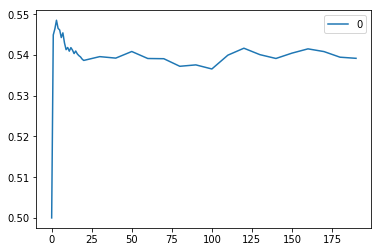

In [37]:
dfnest.plot()